# matplotlibの使い方

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

## 概要
### 目的
　pyplotでデータをプロットする際に必要となる知識をまとめるというのが前提目標です。
この手のまとめは、すべての知識をまとめるのは不可能で、"それ以外はマニュアルを見なさいよ"となるわけなのですが、
マニュアルやgoogle先生に質問する際の前提知識がないと、それもなかなか難しいです。
そして、実際問題としては、普段使いの時にコピペで使えるフォーマットというものが欲しいものです。  
　そこで、ここでは、基本的な知識をおさえながら、[普段使いできるフォーマット](#普段使い用のフォーマット)を目的とします。

### 前提知識
　pyplotでデータをプロットするためには２種類の流儀があります。
これは有名な話ではあるのですが、このことを知らないとマニュアルやgoogleで調べたサンプルコードや解説で混乱する可能性が高いです。
２種類の流儀とは、matlab型とオブジェクト指向型です。
ここでの説明を含め、matplotlibの説明で"おや?"っと思ったら、その説明がどちらの流儀に沿ったものなのかを確認するとよいです。  
　このファイルではオブジェクト指向型の流儀に従って説明を行っていくことをここで明言しておきます。
オブジェクト指向型を用いる理由は、拡張性・自由度が高く、Pythonのコードとして理解しやすいためです。  
　オブジェクト指向型のプロットについて、分かりやすさを重視した（一部正確性に欠ける）説明をします。
Figureクラスというキャンバスに、Axesクラスという個々のグラフを保持させます。
Axesクラスにはプロットするデータの数値情報だけではなく、グラフに関するデザインや補足情報（グラフのタイトルなど）が保持されます。
Axesクラスには複数のプロットに関するデータ情報を保持させることができ、これにより複数種類のデータ（例えば横浜の気温と京都の気温）を一つのグラフ(=Axes)にプロットすることができます。  

> このファイルでは、"データ情報"とはデータの数値情報だけではなく、
そのデータをプロットするグラフの種類（散布図・ヒストグラムなど）や、そのプロットのデザイン情報（色やマーカーなど）を含むものとします。


### 参考HP
- [オブジェクト指向でのプロット](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)
- [調整のもろもろ](https://qiita.com/nkay/items/d1eb91e33b9d6469ef51)

## サンプルデータの準備
### LinePlot用

In [2]:
# numpy.array
# linspaceでx座標のデータを作って、それをもとにy=f(x)でy座標のデータを生成する
line_x = np.linspace(0,10,50)
line_y1 = np.cos(line_x)
line_y2 = 2*np.sin(line_x)
line_x_y1 = np.array([line_x, line_y1]).T

In [3]:
# pandas.Serise, pandas.DataFrame
# 上で作ったnumpy用のy座標データのみ、SeriesやDataFrameに格納。x座標はindexを用いる。
line_x_y1_ser = pd.Series(line_y1, index=line_x)
line_x_y2_ser = pd.Series(line_y2, index=line_x)
line_xy_df = pd.DataFrame(np.array([line_y1,line_y2]).T, columns=["y1", "y2"], index=line_x)

### ScatterPlot用
データの作り方はLinePlot用と同じで、データ数を少し減らしている

In [4]:
# numpy.array
scat_x = np.linspace(1,10,10)
scat_y1 = - scat_x
scat_y2 = 1.5 * scat_x
scat_x_y1 = np.array([scat_x, scat_y1]).T

In [5]:
# pandas.Serise, pandas.DataFrame
scat_x_y1_ser = pd.Series(scat_y1, index=scat_x)
scat_x_y2_ser = pd.Series(scat_y2, index=scat_x)
scat_xy_df = pd.DataFrame(np.array([scat_y1,scat_y2]).T, columns=["y1", "y2"], index=scat_x)

## 基本のプロット
やることはシンプルで、
1. `plt.subplots()`でAxesインスタンスを保持したFigureインスタンスを作成する。引数の1番目と2番目は、Figureに保持させるAxesの配置（数）を指定するためのもので、それぞれ行・列に対応する。figsize引数は後述するが、Figure全体のサイズを指定するためのもの。
1. Axesインスタンスに、データ情報を１種類ずつ追加する。`axes.plot()`や`axes.scatter()`はAxesインスタンスにプロット用のデータ情報を保持させるヘルパーメソッド。ヘルパーメソッドは、他にも色々ある。

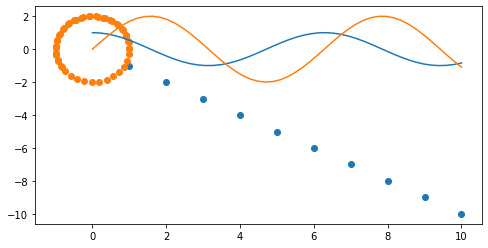

In [6]:
# lineやscatterの区別はないのでまぜこぜでもOK
fig, axes = plt.subplots(1,1,figsize=(8,4))
axes.plot(line_x, line_y1)
axes.plot(line_x_y2_ser)
axes.scatter(scat_x, scat_y1)
axes.scatter(line_xy_df["y1"], line_xy_df["y2"])

### numpy
x軸のデータとy軸のデータを一つずつ、順番に明示的に指定する必要がある。  

> xを省略したり、いっぺんに複数をプロットしたりと、やれることは色々あるが、  
上記のような考え方をしておくのが、可読性も含めて、実用的。

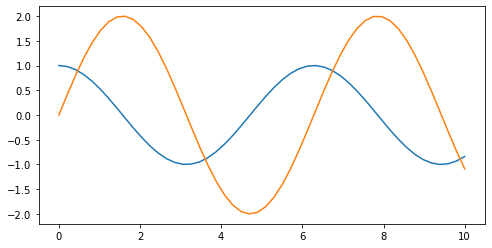

In [7]:
# Lineプロット
fig, axes = plt.subplots(1,1,figsize=(8,4))
axes.plot(line_x, line_y1)
axes.plot(line_x, line_y2)

# これらは思ったようにプロットされない
# axes.plot(line_x_y1) # xとy1がy軸にプロットされる(x軸はデータ数)
# axes.plot([line_y1, line_y2])

# この書き方はエラー
# axes.plot(line_x, [line_y1, line_y2])

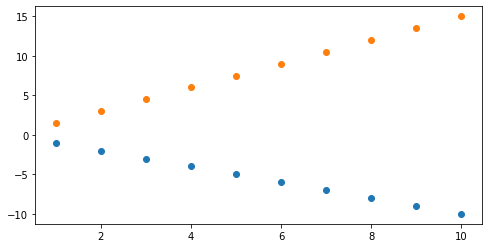

In [8]:
# Scatterプロット
# LinePlotと同じ
fig, axes = plt.subplots(1,1,figsize=(8,4))
axes.scatter(scat_x, scat_y1)
axes.scatter(scat_x, scat_y2)


### pandas
LinePlotでは、xを指定しないとデフォルトでindexをx軸に使ってプロットする。  
一方で、ScatterPlotではx軸の情報を指定しないとエラー。

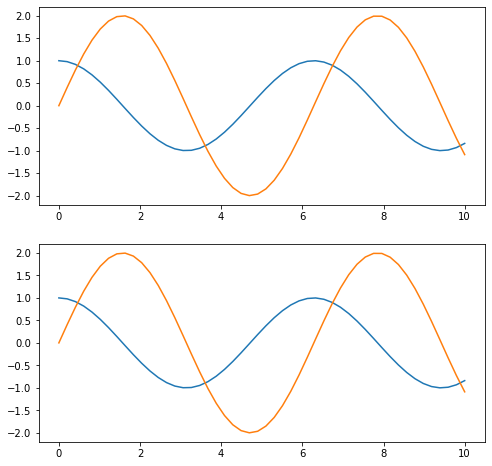

In [9]:
# Lineプロット
fig, axes = plt.subplots(2,1,figsize=(8,8))
# Seriesを個々にプロットする
axes[0].plot(line_x_y1_ser)
axes[0].plot(line_x_y2_ser)

# DataFrameでまとめてプロットも可能
axes[1].plot(line_xy_df)

# これは思ったようにプロットされない
# axes.plot([line_x_y1_ser, line_x_y2_ser])

# もちろん、明示的にxを指定することでindex以外の情報をx軸として利用することができる
# axes.plot(line_x_y1_ser, line_x_y2_ser)


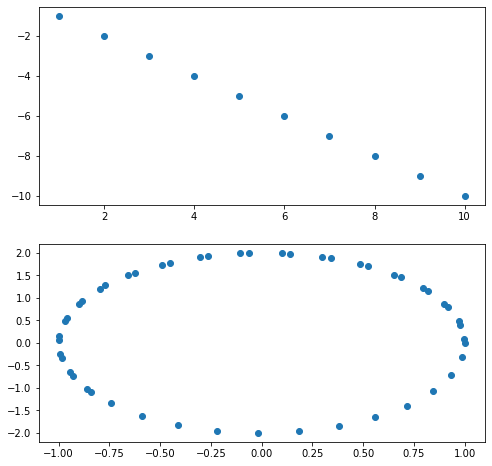

In [10]:
# Scatterプロット
# Indexは自動的にx座標として認識されない
fig, axes = plt.subplots(2,1,figsize=(8,8))
# axes.scatter(scat_x_y1_ser) # これがエラー

# 少し強引だが、indexをx軸に使いたいときも、明示的にx座標にindexを渡す必要がある
axes[0].scatter(scat_x_y1_ser.index, scat_x_y1_ser) 

# DataFrameの場合も、明示的にx座標とy座標のデータを指定する必要がある
axes[1].scatter(line_xy_df["y1"], line_xy_df["y2"]) 

## デコレーション（基本編）
### Axesのみの操作で行う事柄＋アルファ
以下のような、最低限度必要になるような事柄のサンプルコードを示す。  
- グラフのサイズを変更する
- Plotのスタイル（色・形・サイズ）
- x軸・y軸・グラフのタイトルをつける
- フォントサイズを変更する
- いい感じに配置するためのおまじない

基本的には、プロットのデータ情報に固有なものは、`axes.plot`や`axes.scatter`の引数情報として渡し、プロット全体についての設定は`axes.set`で渡す。
`axes.set`で設定するもののうち、さらに細かい設定を行いたくなるようなものには、`axes.set_XX`というヘルパーメソッドが準備されている。例えば、グラフのタイトルは、`axes.set(title="ABC")`とすることもできるが、明示的にフォントサイズを変えたりしたいので、`axes.set_title`を用いる

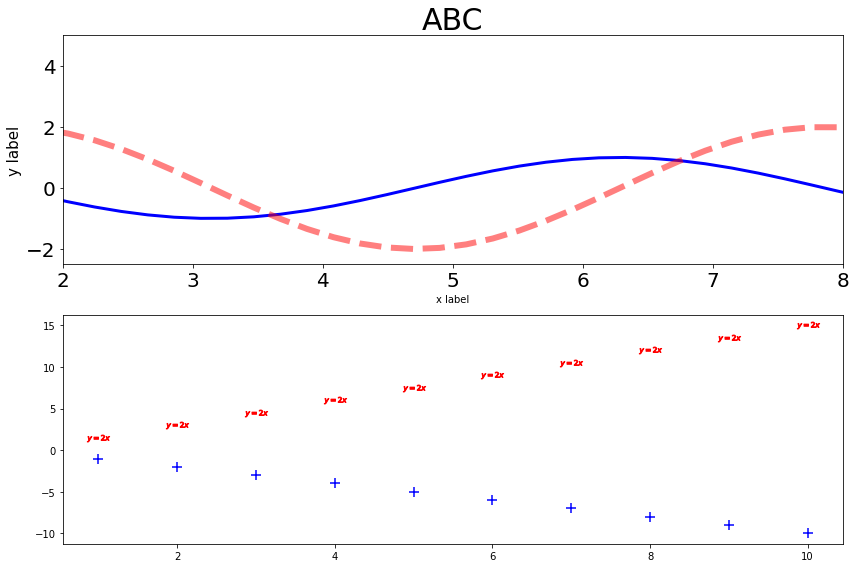

In [11]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
axes[0].plot(line_x, line_y1, color="b", lw=3)
axes[0].plot(line_x, line_y2, color="r", linestyle="dashed", lw=6, alpha=0.5)   # "lw"は線の太さ
axes[0].tick_params(labelsize=20)    # 目盛りのサイズを変更
axes[0].set(xlim=(2,8), ylim=(-2.5,5))
axes[0].set_title("ABC", fontsize=30)   # 図のタイトル
axes[0].set_xlabel("x label", fontsize=10)  # x軸名
axes[0].set_ylabel("y label", fontsize=15)  # y軸名

axes[1].scatter(scat_x, scat_y1, color="b", marker="+", s=100)
axes[1].scatter(scat_x, scat_y2, color="r", marker="$y=2x$", s=500) # 参考：makerに"$...$"という形で渡すと、数式をマーカーにできる

plt.tight_layout()  # 配置をいい感じにするおまじない

### 凡例について
凡例はデータ情報をAxesに追加する際に、`label`という形でデータ情報名を与え、それを凡例として表示する。  
Axes毎に表示させるのが自然であるが、場合によってはFigureでまとめて表示することもできる。
#### Axes毎に表示
Axes.legent()メソッドを用いることで、Axes毎に凡例を表示することができる。  
デフォルトでいい感じの位置を判断して配置してくれるが、明示的に指定したい場合は`loc`引数で指定することも可能。

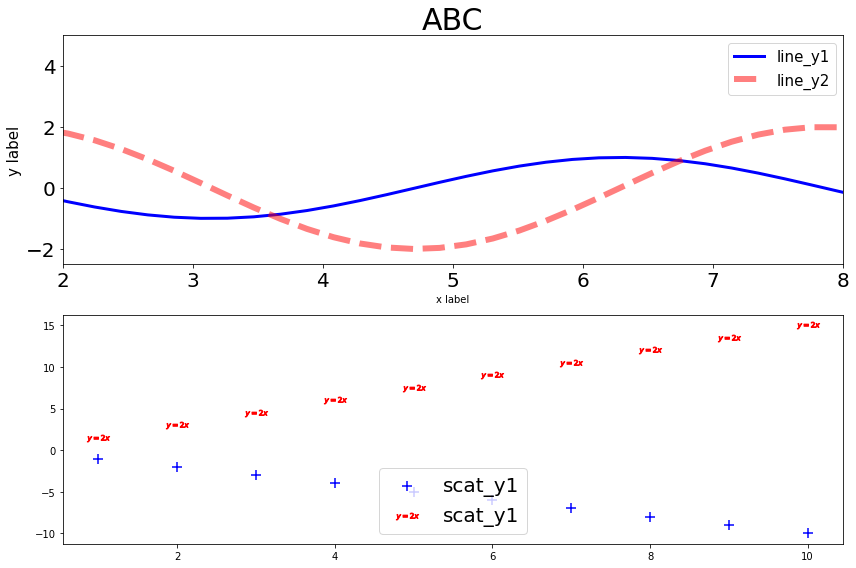

In [12]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
axes[0].plot(line_x, line_y1, color="b", lw=3, label="line_y1")
axes[0].plot(line_x, line_y2, color="r", linestyle="dashed", lw=6, alpha=0.5, label="line_y2")   # "lw"は線の太さ
axes[0].tick_params(labelsize=20)    # 目盛りのサイズを変更
axes[0].set(xlim=(2,8), ylim=(-2.5,5))
axes[0].set_title("ABC", fontsize=30)   # 図のタイトル
axes[0].set_xlabel("x label", fontsize=10)  # x軸名
axes[0].set_ylabel("y label", fontsize=15)  # y軸名
axes[0].legend(fontsize=15) # 凡例を追加

axes[1].scatter(scat_x, scat_y1, color="b", marker="+", s=100, label="scat_y1")
axes[1].scatter(scat_x, scat_y2, color="r", marker="$y=2x$", s=500, label="scat_y1") # 参考：makerに"$...$"という形で渡すと、数式をマーカーにできる
axes[1].legend(fontsize=20, loc="lower center") # 凡例を追加

plt.tight_layout()  # 配置をいい感じにするおまじない

#### Figureで一つを表示
Figure.legend()を用いることで、Figureに含まれるすべてのAxesが持つ、すべてのデータ情報の凡例をまとめて表示することもできる。  
Axes.legend()と同様に`loc`引数を用いて表示場所を指定できるが、ここではさらに詳細な位置の指定を行う`bbox_to_anchor`引数の例を示す。  
凡例の箱の`loc`を対象オブジェクト(FigureやAxes)のどの座標`bbox_to_anchor`に配置するかを指定する。
ここで、`bbox_to_anchor`の指定の有無で`loc`引数の意味合いが変わる点には注意が必要である。

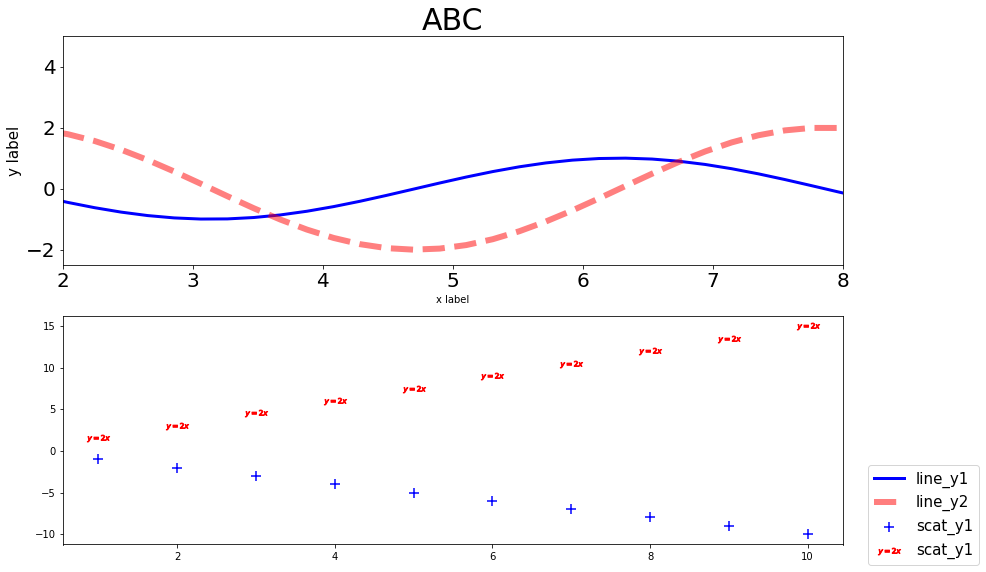

In [13]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
axes[0].plot(line_x, line_y1, color="b", lw=3, label="line_y1")
axes[0].plot(line_x, line_y2, color="r", linestyle="dashed", lw=6, alpha=0.5, label="line_y2")   # "lw"は線の太さ
axes[0].tick_params(labelsize=20)    # 目盛りのサイズを変更
axes[0].set(xlim=(2,8), ylim=(-2.5,5))
axes[0].set_title("ABC", fontsize=30)   # 図のタイトル
axes[0].set_xlabel("x label", fontsize=10)  # x軸名
axes[0].set_ylabel("y label", fontsize=15)  # y軸名

axes[1].scatter(scat_x, scat_y1, color="b", marker="+", s=100, label="scat_y1")
axes[1].scatter(scat_x, scat_y2, color="r", marker="$y=2x$", s=500, label="scat_y1") # 参考：makerに"$...$"という形で渡すと、数式をマーカーにできる

fig.legend(fontsize=15, loc='lower left', bbox_to_anchor=(1, 0))    # 凡例を追加

plt.tight_layout()  # 配置をいい感じにするおまじない

## 普段使い用のフォーマット
これまでの内容に、補助線と領域の塗りつぶしを加えて、普段使い用のフォーマットとする。

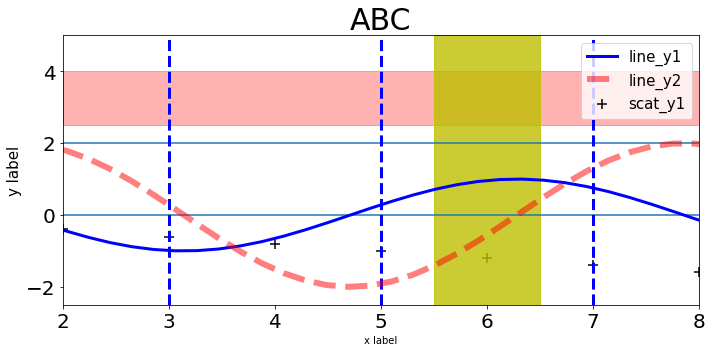

In [34]:
fig, axes = plt.subplots(1,1,figsize=(10,5))

# データ情報の登録
axes.plot(line_x, line_y1, color="b", lw=3, label="line_y1")
axes.plot(line_x, line_y2, color="r", linestyle="dashed", lw=6, alpha=0.5, label="line_y2")
axes.scatter(scat_x, scat_y1/5, color="k", marker="+", s=100, label="scat_y1")

# Axesのプロパティを登録
axes.tick_params(labelsize=20)    # 目盛りのサイズを変更
axes.set(xlim=(2,8), ylim=(-2.5,5))
axes.set_title("ABC", fontsize=30)   # 図のタイトル
axes.set_xlabel("x label", fontsize=10)  # x軸名
axes.set_ylabel("y label", fontsize=15)  # y軸名
axes.legend(fontsize=15) # 凡例を追加
axes.hlines(y=[0,2], xmin=2, xmax=8)    # 水平補助線
axes.vlines(x=[3,5,7], ymin=-2.5, ymax=5, colors="b", lw=3, linestyle="dashed") # 垂直補助線
axes.axhspan(ymin=2.5, ymax=4, color="r", alpha=0.3)    # 水平領域塗りつぶし
axes.axvspan(xmin=5.5, xmax=6.5, color="y", alpha=0.8)  # 垂直領域塗りつぶし

# グラフ全体のプロパティ
fig.patch.set_alpha(1)  # グラフの背景を透かさない
plt.tight_layout()  # 配置をいい感じにするおまじない


## 特殊なプロット
ここでは普段使いのフォーマットというよりも、必要に応じて、上記フォーマットに追加するような特殊なプロットについて
- 2軸
- エラーバー
- 対数軸
### 2軸

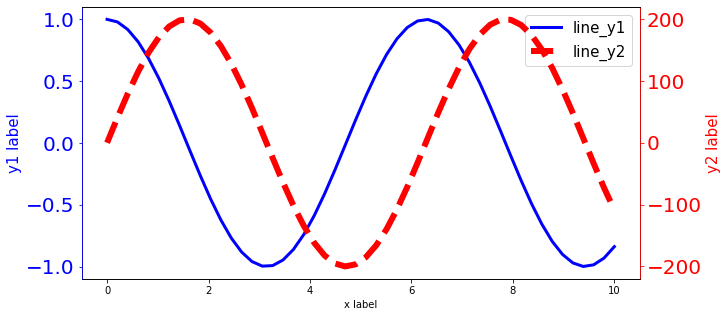

In [15]:
fig, axes = plt.subplots(1,1,figsize=(10,5))
axes2 = axes.twinx()

# データ情報の登録
axes.plot(line_x, line_y1, color="b", lw=3, label="line_y1")
axes2.plot(line_x, 100*line_y2, color="r", linestyle="dashed", lw=6, label="line_y2")

axes.set_xlabel("x label", fontsize=10)  # x軸名

# y1軸
axes.set_ylabel("y1 label", fontsize=15, color="b") # 軸名
axes.tick_params(axis="y", colors="b", labelsize=20)    # 目盛りの色

# y2軸
axes2.set_ylabel("y2 label", fontsize=15, color="r")
axes2.tick_params(axis="y", colors="r", labelsize=20)
## axesの上にaxes2があるので、axes2の軸の色が表示される
axes2.spines["left"].set_color("b")
axes2.spines["right"].set_color("r")

# 凡例
h1, l1 = axes.get_legend_handles_labels()
h2, l2 = axes2.get_legend_handles_labels()
axes.legend(h1+h2, l1+l2, fontsize=15)

fig.patch.set_alpha(1)

### 対数軸

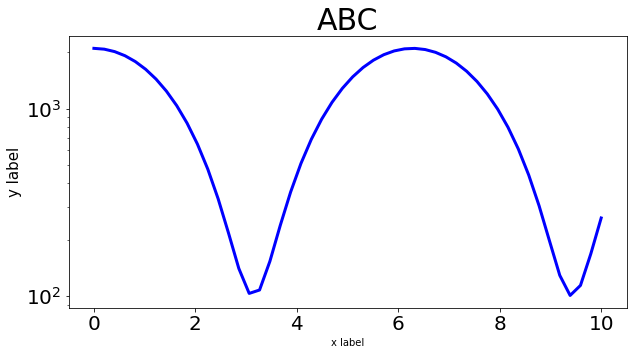

In [16]:
fig, axes = plt.subplots(1,1,figsize=(10,5))

# データ情報の登録
axes.plot(line_x, 1000*(line_y1+1.1), color="b", lw=3, label="line_y1")

axes.set_yscale("log")

axes.set_title("ABC", fontsize=30)   # 図のタイトル
axes.set_xlabel("x label", fontsize=10)  # x軸名
axes.set_ylabel("y label", fontsize=15)  # y軸名
axes.tick_params(labelsize=20)    # 目盛りのサイズを変更

fig.patch.set_alpha(1)

### エラーバー
`Axes.errorbar()`メソッドを用いる

In [20]:
# エラーの大きさを表すデータを準備
yerr = [0.2 * i for i in range(len(scat_x))]

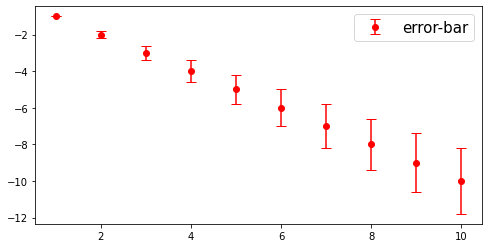

In [30]:
fig, axes = plt.subplots(1,1,figsize=(8,4))
axes.errorbar(scat_x, scat_y1, yerr=yerr, marker="o", color="red", capsize=5, linestyle="None", label="error-bar")
axes.legend(fontsize=15) # 凡例を追加